## Comparing the dynamics of the reaction `A <-> B` , with and without an enzyme

LAST REVISED: June 23, 2024 (using v. 1.0 beta36)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from life123 import ChemData
from life123 import UniformCompartment

# 1. WITHOUT ENZYME
### `A` <-> `B`

In [3]:
# Initialize the system
chem_data = ChemData(names=["A", "B"])

# Reaction A <-> B , with 1st-order kinetics, favorable thermodynamics in the forward direction, 
# and a forward rate that is much slower than it would be with the enzyme - as seen in part 2, below
chem_data.add_reaction(reactants="A", products="B",
                       forward_rate=1., delta_G=-3989.73)

chem_data.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 1 / kR = 0.2 / delta_G = -3,989.7 / K = 5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'A', 'B'}


### Set the initial concentrations of all the chemicals

In [4]:
dynamics = UniformCompartment(chem_data=chem_data, preset="fast")
dynamics.set_conc(conc={"A": 20.},
                  snapshot=True)
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 20.0
  Species 1 (B). Conc: 0.0
Set of chemicals involved in reactions: {'A', 'B'}


### Take the initial system to equilibrium

In [5]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(duration=3.0,
                                  initial_step=0.1, variable_steps=True)

16 total step(s) taken
Number of step re-do's because of negative concentrations: 0
Number of step re-do's because of elective soft aborts: 1
Norm usage: {'norm_A': 10, 'norm_B': 9, 'norm_C': 8, 'norm_D': 8}


In [6]:
#dynamics.explain_time_advance()

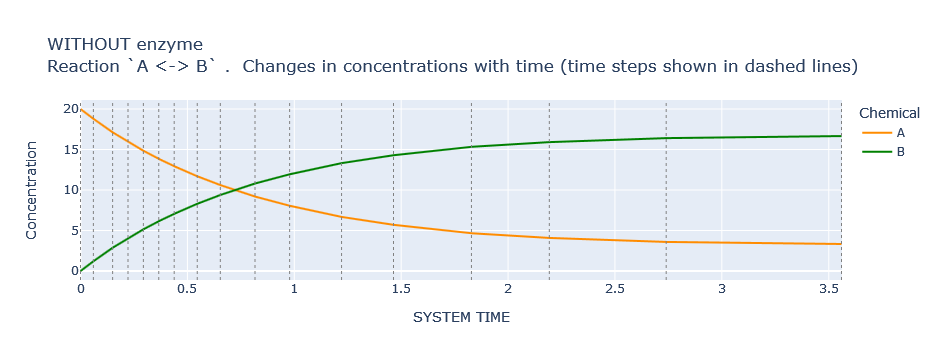

In [7]:
dynamics.plot_history(colors=['darkorange', 'green'], show_intervals=True, title_prefix="WITHOUT enzyme")

#### Note how the time steps get automatically adjusted, as needed by the amount of change - including a complete step abort/redo at time=0

In [8]:
dynamics.curve_intersect("A", "B", t_start=0, t_end=1.0)

(0.7243697199909254, 10.000000000000002)

In [9]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 3.337 ; [B] = 16.66
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 4.99265
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 5.00001
Discrepancy between the two values: 0.1471 %
Reaction IS in equilibrium (within 1% tolerance)



True

# 2. WITH ENZYME `E`
### `A` + `E` <-> `B` + `E`

### Note: for the sake of the demo, we'll completely ignore the concomitant (much slower) direct reaction A <-> B
This in an approximation that we'll drop in later experiments

In [10]:
# Initialize the system
chem_data = ChemData(names=["A", "B", "E"])

# Reaction A + E <-> B + E , with 1st-order kinetics, and a forward rate that is faster than it was without the enzyme
# Thermodynamically, there's no change from the reaction without the enzyme
chem_data.add_reaction(reactants=["A", "E"], products=["B", "E"],
                       forward_rate=10., delta_G=-3989.73)

chem_data.describe_reactions()  # Notice how the enzyme `E` is noted in the printout below

Number of reactions: 1 (at temp. 25 C)
0: A + E <-> B + E  (kF = 10 / kR = 2 / delta_G = -3,989.7 / K = 5) | Enzyme: E | 1st order in all reactants & products
Set of chemicals involved in the above reactions (not counting enzymes): {'A', 'B'}
Set of enzymes involved in the above reactions: {'E'}


### Notice how, while the ratio kF/kR is the same as it was without the enzyme (since it's dictated by the energy difference), the individual values of kF and kR now are each 10 times bigger than before

### Set the initial concentrations of all the chemicals (to what they originally were)

In [11]:
dynamics = UniformCompartment(chem_data=chem_data, preset="mid")
dynamics.set_conc(conc={"A": 20., "B": 0., "E": 30.},
                  snapshot=True)      # Plenty of enzyme `E`
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (A). Conc: 20.0
  Species 1 (B). Conc: 0.0
  Species 2 (E). Conc: 30.0
Set of chemicals involved in reactions (not counting enzymes): {'A', 'B'}
Set of enzymes involved in reactions: {'E'}


### Take the initial system to equilibrium

In [12]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(duration=0.1,
                                  initial_step=0.1, variable_steps=True)

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
43 total step(s) taken
Number of step re-do's because of negative concentrations: 3
Number of step re-do's because of elective soft aborts: 2
Norm usage: {'norm_A': 31, 'norm_B': 28, 'norm_C': 28, 'norm_D': 28}


#### Note how the (proposed) initial step - kept the same as the previous run - is now _extravagantly large_, given the much-faster reaction dynamics.  However, the variable-step engine intercepts and automatically corrects the problem!

In [13]:
#dynamics.explain_time_advance()

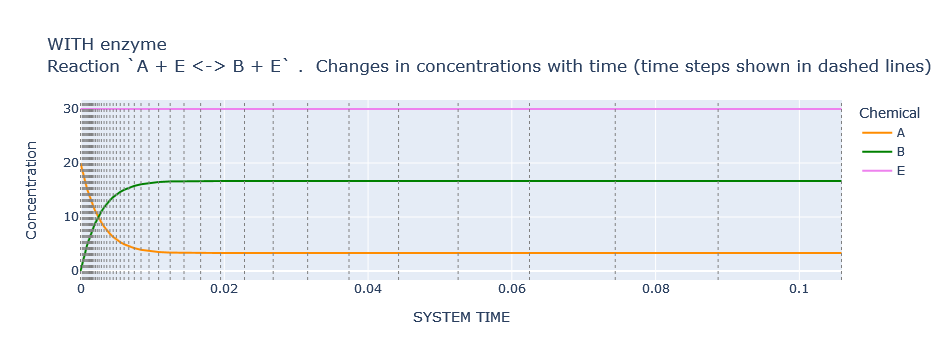

In [14]:
dynamics.plot_history(colors=['darkorange', 'green', 'violet'], show_intervals=True, title_prefix="WITH enzyme")

In [15]:
dynamics.curve_intersect("A", "B", t_start=0, t_end=0.02)

(0.0024674107137523833, 10.000000000000002)

In [16]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

0: A + E <-> B + E
Final concentrations: [A] = 3.334 ; [E] = 30 ; [B] = 16.67
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 4.99958
    Formula used:  ([B][E]) / ([A][E])
2. Ratio of forward/reverse reaction rates: 5.00001
Discrepancy between the two values: 0.008546 %
Reaction IS in equilibrium (within 1% tolerance)



True

## Thanks to the (abundant) enzyme, the reaction reaches equilibrium roughly around t=0.02, far sooner than the roughly t=3.5 without enzyme
The concentrations of `A` and `B` now become equal (cross-over) at t=0.00246 , rather than t=0.740

In [17]:
dynamics.get_history()

SYSTEM TIME          A          B     E            caption
0      0.000000  20.000000   0.000000  30.0  Initialized state
1      0.000250  18.500000   1.500000  30.0                   
2      0.000375  17.817500   2.182500  30.0                   
3      0.000500  17.165712   2.834288  30.0                   
4      0.000625  16.543255   3.456745  30.0                   
5      0.000750  15.948809   4.051191  30.0                   
6      0.000875  15.381112   4.618888  30.0                   
7      0.001000  14.838962   5.161038  30.0                   
8      0.001125  14.321209   5.678791  30.0                   
9      0.001250  13.826755   6.173245  30.0                   
10     0.001375  13.354551   6.645449  30.0                   
11     0.001525  12.813405   7.186595  30.0                   
12     0.001675  12.301481   7.698519  30.0                   
13     0.001855  11.720345   8.279655  30.0                   
14     0.002071  11.068171   8.931829  30.0                   
15     0.002330  10.346417   9.653583  30.0                   
16     0.002589   9.692012  10.307988  30.0                   
17     0.002900   8.980003  11.019997  30.0                   
18     0.003274   8.221264  11.778736  30.0                   
19     0.003647   7.564476  12.435524  30.0                   
20     0.004095   6.882233  13.117767  30.0                   
21     0.004543   6.309997  13.690003  30.0                   
22     0.004991   5.830030  14.169970  30.0                   
23     0.005528   5.346939  14.653061  30.0                   
24     0.006066   4.957322  15.042678  30.0                   
25     0.006711   4.580248  15.419752  30.0                   
26     0.007485   4.232821  15.767179  30.0                   
27     0.008413   3.932073  16.067927  30.0                   
28     0.009528   3.691843  16.308157  30.0                   
29     0.010865   3.519230  16.480770  30.0                   
30     0.012470   3.411824  16.588176  30.0                   
31     0.014396   3.357403  16.642597  30.0                   
32     0.016707   3.337375  16.662625  30.0                   
33     0.019480   3.333337  16.666663  30.0                   
34     0.022808   3.333329  16.666671  30.0                   
35     0.026802   3.333331  16.666669  30.0                   
36     0.031594   3.333330  16.666670  30.0                   
37     0.037345   3.333331  16.666669  30.0                   
38     0.044245   3.333330  16.666670  30.0                   
39     0.052526   3.333332  16.666668  30.0                   
40     0.062463   3.333327  16.666673  30.0                   
41     0.074388   3.333341  16.666659  30.0                   
42     0.088697   3.333285  16.666715  30.0                   
43     0.105869   3.333568  16.666432  30.0